# Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
complete_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data['Duplicates'] = complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
complete_data.loc[complete_data['Duplicates'] == True]

column_values = complete_data.loc[complete_data['Duplicates'] == True, 'Mouse ID'].values
column_values

array(['g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989', 'g989',
       'g989', 'g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data['Duplicates'] = complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
complete_data.loc[complete_data['Duplicates'] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
107,g989,Propriva,Female,21,26,0,45.000000,0,True
137,g989,Propriva,Female,21,26,0,45.000000,0,True
329,g989,Propriva,Female,21,26,5,48.786801,0,True
360,g989,Propriva,Female,21,26,5,47.570392,0,True
620,g989,Propriva,Female,21,26,10,51.745156,0,True
681,g989,Propriva,Female,21,26,10,49.880528,0,True
815,g989,Propriva,Female,21,26,15,51.325852,1,True
869,g989,Propriva,Female,21,26,15,53.442020,0,True
950,g989,Propriva,Female,21,26,20,55.326122,1,True
1111,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[~(complete_data['Mouse ID'] == "g989")]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,b128,Capomulin,Female,9,22,0,45.0,0,False
1,f932,Ketapril,Male,15,29,0,45.0,0,False
2,g107,Ketapril,Female,2,29,0,45.0,0,False
3,a457,Ketapril,Female,11,30,0,45.0,0,False
4,c819,Ketapril,Male,21,25,0,45.0,0,False


In [6]:
# Checking the number of mice.
clean_data["Mouse ID"].nunique()

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


drug_summary = pd.concat([mean, median, var, std, sem], axis=1)
drug_summary.columns = ['Mean Tumor Volume', 
                        'Median Tumor Volume', 
                        'Variance Tumor Volume', 
                        'Tumor Volume Std. Dev.', 
                        'Total Volume Std. Err.']

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Total Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Drug_Regimen = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
Drug_Regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar & Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

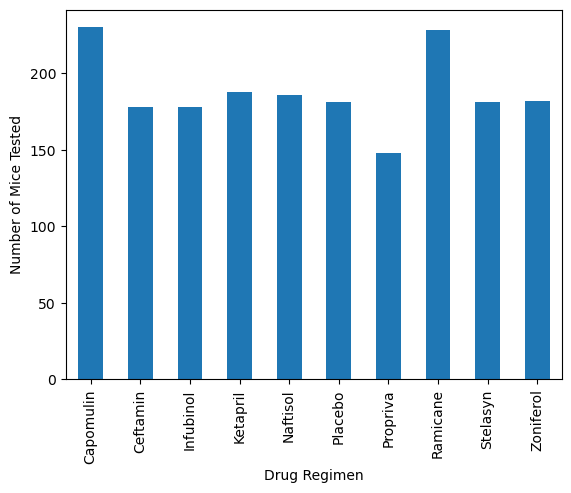

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar_chart = clean_data.groupby('Drug Regimen')['Timepoint'].count()

pandas_bar_chart.plot(kind='bar',
              xlabel='Drug Regimen',
              ylabel='Number of Mice Tested')

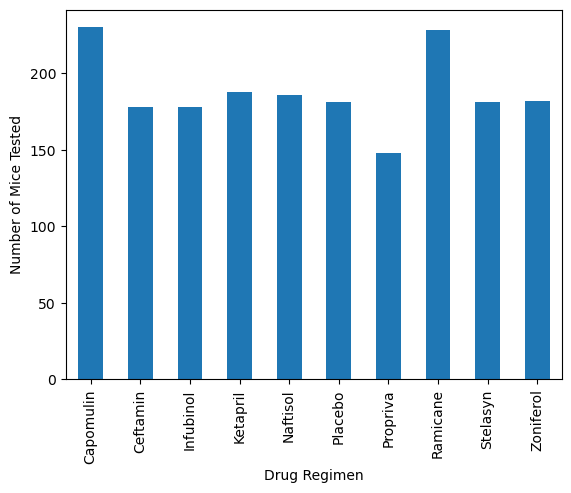

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Create Bar Chart
clean_data.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar')

#Add axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

#Show Plot
plt.show()

<AxesSubplot:ylabel='Sex'>

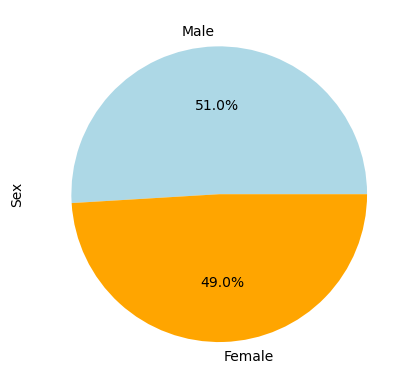

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Change male/female to integers
pandas_sex_data = clean_data['Sex'].value_counts()
pandas_sex_data

# Create Pie Chart
pandas_sex_data.plot.pie(autopct='%1.1f%%', labels=["Male","Female"], colors=["LightBlue","Orange"])

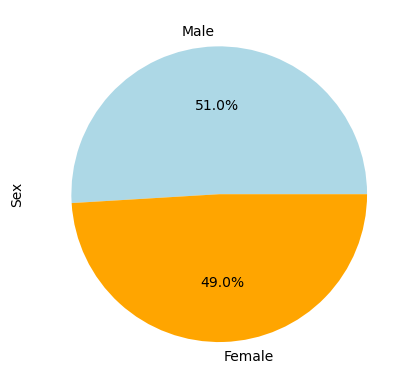

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_sex_data = clean_data['Sex'].value_counts()
pyplot_sex_data

labels = ["Male","Female"]
colors = ["LightBlue","Orange"]

#Create Pie Graph
plt.pie(pyplot_sex_data, autopct='%1.1f%%', labels=labels, colors=colors)

# Add axis labels
plt.ylabel('Sex')

#Show Plot
plt.show()


# Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

grouped_data = clean_data.groupby('Mouse ID')
timepoint_clean_data = grouped_data.apply(lambda x: x[x.Timepoint == x.Timepoint.max()])
timepoint_clean_data
consolidated_clean_data = timepoint_clean_data[(timepoint_clean_data['Drug Regimen'].isin(["Capomulin",
                                                                                            "Ramicane",
                                                                                            "Infubinol",
                                                                                            "Ceftamin"]))]
consolidated_clean_data

,,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
Mouse ID,,,,,,,,,,
a203,1804,a203,Infubinol,Female,20,23,45,67.973419,2,False
a251,1786,a251,Infubinol,Female,21,25,45,65.525743,1,False
a275,1856,a275,Ceftamin,Female,20,28,45,62.999356,3,False
a411,1773,a411,Ramicane,Male,3,22,45,38.407618,1,False
a444,1836,a444,Ramicane,Female,10,25,45,43.047543,0,False
...,...,...,...,...,...,...,...,...,...,...
y769,1767,y769,Ceftamin,Female,6,27,45,68.594745,4,False
y793,1797,y793,Capomulin,Male,17,17,45,31.896238,2,False
y865,1766,y865,Ceftamin,Male,23,26,45,64.729837,3,False


In [14]:
import pandas as pd
import numpy as np

# calculate IQR and outliers for each group
for treatment, group in consolidated_clean_data.groupby('Drug Regimen'):
    q1 = group['Tumor Volume (mm3)'].quantile(0.25)
    q3 = group['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = group[(group['Tumor Volume (mm3)'] < lower_bound) | (group['Tumor Volume (mm3)'] > upper_bound)]
    print(f"Potential Outliers for {treatment}:")
    print(f"Outliers: {outliers['Tumor Volume (mm3)'].values}")


Potential Outliers for Capomulin:
Outliers: []
Potential Outliers for Ceftamin:
Outliers: []
Potential Outliers for Infubinol:
Outliers: [36.3213458]
Potential Outliers for Ramicane:
Outliers: []


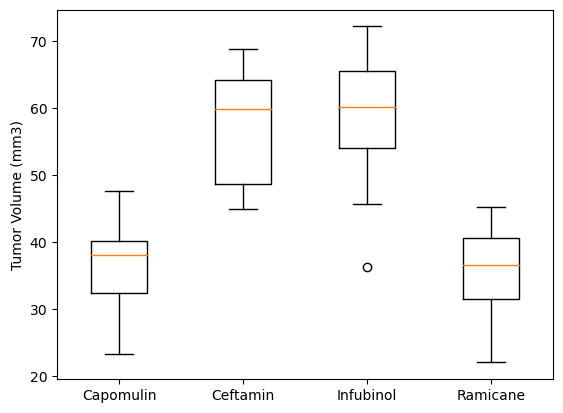

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_Data = []

# Extract Tumor Volume data for each treatment
for treatment, group in consolidated_clean_data.groupby('Drug Regimen'):
    if treatment in treatments:
        Tumor_Vol_Data.append(group['Tumor Volume (mm3)'].values)

# Create a box and whisker plot
fig, ax = plt.subplots()
ax.boxplot(Tumor_Vol_Data, labels=treatments)

# Set y-axis label
ax.set_ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()

# Line and Scatter Plots

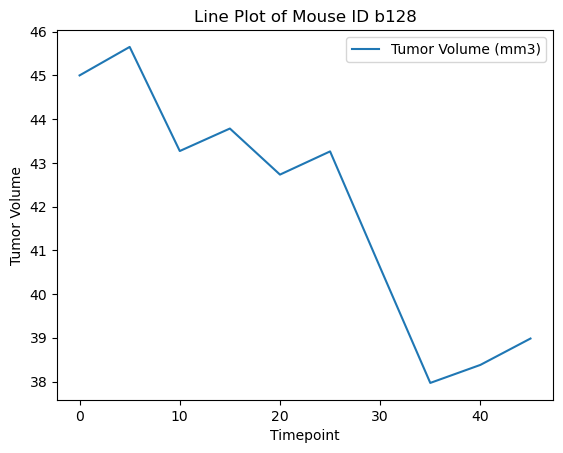

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_clean_data = clean_data[clean_data['Mouse ID'] == "b128"]
capomulin_clean_data

#Create Line graph
capomulin_clean_data.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')

# Add title and axis labels
plt.title('Line Plot of Mouse ID b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

# Show the plot
plt.show()

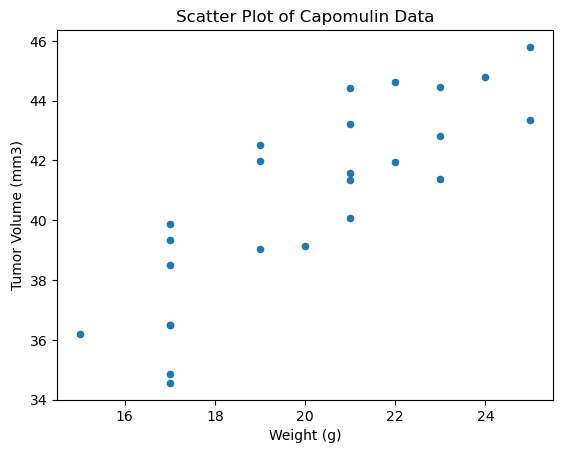

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin2_clean_data = clean_data[clean_data['Drug Regimen'] == "Capomulin"]
capomulin3_clean_data = capomulin2_clean_data.groupby('Mouse ID').agg({'Weight (g)': ['mean'], 'Tumor Volume (mm3)': ['mean']})
capomulin3_clean_data

#Create Scatter Plot
capomulin3_clean_data.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')

# Add title and axis labels
plt.title('Scatter Plot of Capomulin Data')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#Show Plot
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


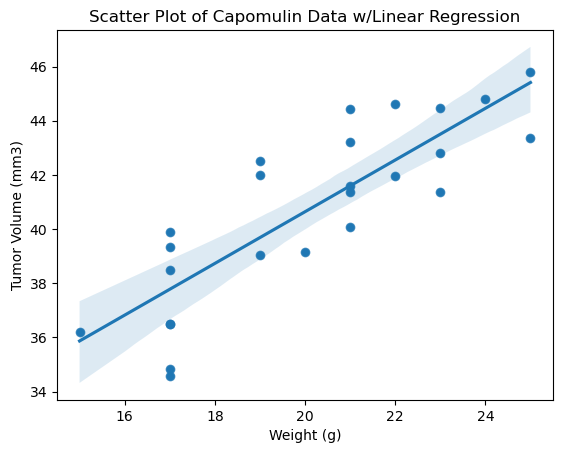

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import seaborn as sns

weight = capomulin3_clean_data.iloc[:,0]
tumor = capomulin3_clean_data.iloc[:,1]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Create Scatter Plot w/linear Regression
capomulin3_clean_data.plot(x='Weight (g)', y='Tumor Volume (mm3)', kind='scatter')
sns.regplot(x='Weight (g)', y='Tumor Volume (mm3)', data=capomulin3_clean_data)

# Add title and axis labels
plt.title('Scatter Plot of Capomulin Data w/Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#Show Plot
plt.show()